Вторая часть#
Реализуйте программу которая будет строить узор Серпинского. История исследования этого узора достаточно длинная, а сам узор представляет особый интерес в такой области, как геометрия фракталов. Узор Серпинского является случайным объектом, определенным рекурсивно, но в пределе его форма стремится к детерминированному объекту.
Алгоритм построения следующий:

Предположим, что в исходном состоянии у нас есть три точки на плоскости, причем их положение описано координатами в некоторой подходящей системе координат: (x_1, y_1), (x_2, y_2), (x_3, y_3)(x 
1
​
 ,y 
1
​
 ),(x 
2
​
 ,y 
2
​
 ),(x 
3
​
 ,y 
3
​
 ).

Случайно выбирается некоторая точка внутри треугольника, образованного заданными вершинами.
Случайно выбирается одна из трех вершин.
Выбирается точка, равноотстоящая от первой выбранной точки и от выбранной вершины.
Новая точка включается в изображение
Исходная точка заменяется этой новой точкой из изображения.
Повторяется вся процедура, начиная с шага 2.
Таким образом, каждая новая точка, созданная на шаге 3, включается в изображение. Начальный этап алгоритма проиллюстрирован на рисунке., где P_0P 
0
​
  — исходная точка (см. шаг 1), a P_1P 
1
​
  и P_2P 
2
​
  — две точки, сформированные в процессе двух последовательных циклов описанного алгоритма. Для построения фигуры используйте функцию plt.scatter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep us

Line Solution is y = -1.9999999999999991x + 39.99999999999999
Line Solution is y = 1.9999999999999993x + -6.882807356604676e-17
Line Solution is y = 0.0x + 0.0
finished


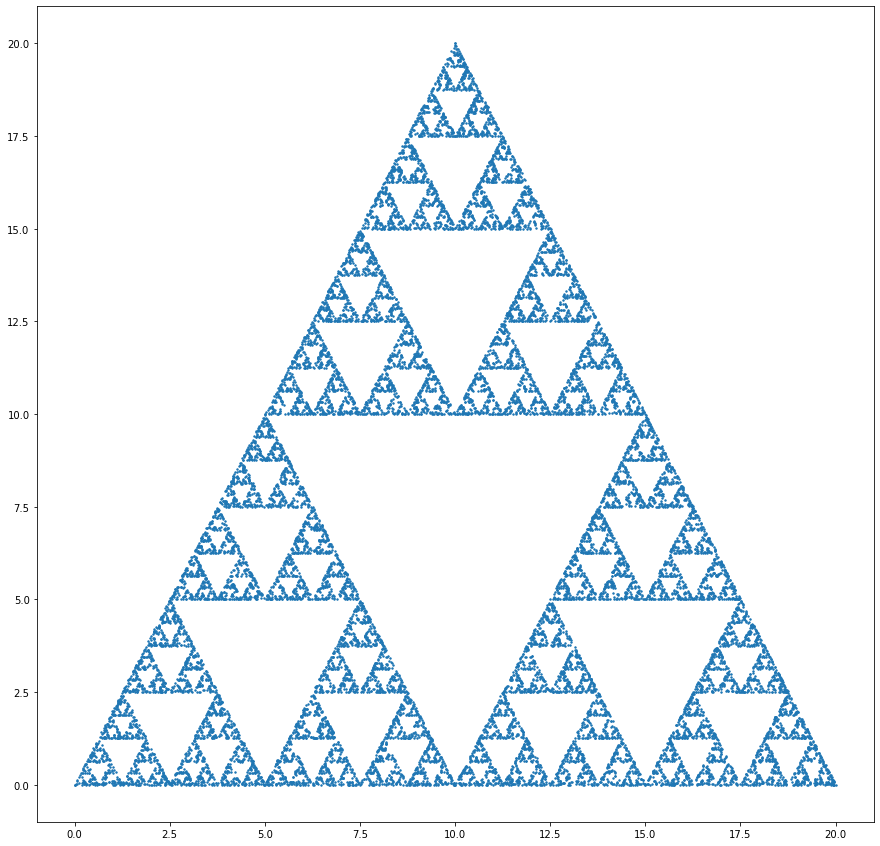

In [5]:
from matplotlib.backend_bases import key_press_handler
from numpy import ones,vstack
from numpy.linalg import lstsq
import numpy as np 
import matplotlib.pyplot as plt
import random
import sys

x0y0=np.array([0,0])
x1y1=np.array([10,20])
x2y2=np.array([20,0])

triangle_points=[x0y0, x1y1, x2y2]

x_values=[]
y_values=[]

for i in range(len(triangle_points)):  
  x_values.append(triangle_points[i][0])  
  y_values.append(triangle_points[i][1]) 

#print(x_values, y_values)

# 2-1 line
m=0
c=0
points = [tuple(triangle_points[1]),tuple(triangle_points[2])]
x_coords, y_coords = zip(*points)
#print(x_coords, y_coords)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]

#print(triangle_points[1][0])
for j in range (0, triangle_points[2][0]- triangle_points[1][0]):
  x_values.append((triangle_points[1][0]+j))
  #print(y_values) 
  #print(m)
  y_values.append(((m*(triangle_points[1][0]+j)+c)))  
  #print(y_values) 
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

# 1-0 line
m=0
c=0
points = [tuple(triangle_points[1]),tuple(triangle_points[0])]
x_coords, y_coords = zip(*points)
#print(x_coords, y_coords)
A = vstack([x_coords,ones(len(x_coords))]).T
m10, c10 = lstsq(A, y_coords)[0]

#print(triangle_points[1][0])
for j in range (0, triangle_points[1][0]- triangle_points[0][0]):
  x_values.append((triangle_points[0][0]+j))
  #print(y_values) 
  #print(m)
  y_values.append(((m10*(triangle_points[0][0]+j)+c10)))  
  #print(y_values) 
print(F"Line Solution is y = {m10}x + {c10}")

# 0-2 line
m=0
c=0
points = [tuple(triangle_points[2]),tuple(triangle_points[0])]
x_coords, y_coords = zip(*points)
#print(x_coords, y_coords)
A = vstack([x_coords,ones(len(x_coords))]).T
m02, c02 = lstsq(A, y_coords)[0]

for k in range (0, triangle_points[2][0]- triangle_points[0][0]):
  x_values.append((triangle_points[0][0]+k))
  #print(y_values) 
  #print(m)
  y_values.append(((m02*(triangle_points[0][0]+k)+c02)))  
  #print(y_values) 
print(F"Line Solution is y = {m02}x + {c02}")



def choose_rand_point(triangle_points):
  interval_x=[q for q in range(triangle_points[0][0], triangle_points[2][0])]
  interval_y=[v for v in range(triangle_points[0][1], triangle_points[1][1])]
  
  
  while True:
    x_inter = random.choice(interval_x)
    y_inter = random.choice(interval_y)
    #print(f"vvvvvvvvv{x_inter}, {y_inter}")
    if y_inter > triangle_points[0][1] and y_inter > triangle_points[2][1] and y_inter < triangle_points[1][1]:
     if x_inter < (triangle_points[2][0] - triangle_points[0][0]) / 2 and y_inter < m10*x_inter + c10:      
       #print(f"zzz{x_inter}, {y_inter}")
       point=np.array([x_inter,y_inter])
       return point
       break     

     if x_inter > (triangle_points[2][0] - triangle_points[0][0]) / 2 and y_inter < m*x_inter+c:       
       #print(f"zzz{x_inter}, {y_inter}")       
       point=np.array([x_inter,y_inter])
       return point
       break  
       
dd = choose_rand_point(triangle_points)
counter=0

# first random point
def draw_random_triangles(p0):  
  global counter
  counter+=1  
  peak= random.choice(triangle_points)
  
  if counter == 1:     
    p00 = choose_rand_point(triangle_points)
    #print(p00)
    #print(peak)
    p1=p00/2 + peak/2
    x_values.append(p00[0])
    y_values.append(p00[1])
    
    #print(f"p1...2 {p1}")         
    return draw_random_triangles(p1)
  elif counter > 0 and counter <20000:  
    p00=p0
    p1=p00/2 + peak/2
    x_values.append(p1[0])
    y_values.append(p1[1])  
    peak= random.choice(triangle_points)
    #print(f"p1//2 {p1}")          
    return draw_random_triangles(p1)
  elif counter == 20000: 
    return print ("finished") 

sys.setrecursionlimit(25000)    
b = draw_random_triangles(p0=0)



plt.figure(figsize = (15,15))




plt.scatter(x_values, y_values, s = 2)
plt.show()